## Détection et classification des logiciels malveillants sur Android

source 
https://asterius.federation.edu.au/csmining.org/cdmc2020/

AndMal2020-CDMC : 

La menace inégalée des logiciels malveillants Android est à l'origine de divers problèmes de sécurité sur Internet. L'industrie des malwares Android devient de plus en plus perturbatrice avec près de 12 000 nouvelles instances de malwares Android chaque jour. La détection des logiciels malveillants Android dans les smartphones est une cible essentielle pour que la cyber-communauté se débarrasse des échantillons de logiciels malveillants menaçants.

Les logiciels malveillants Android sont l'une des menaces les plus graves sur Internet, qui a connu une recrudescence sans précédent ces dernières années. C'est un défi ouvert pour les experts en cybersécurité. 

La base de données considérée dans ce projet contient une liste plus de 31000 logiciels classés en 12 catégories et 191 familles. L'objectif est de proposer et comparer des algorithmes de machine learning pour identifier automatiquement la catégories de chacun des logiciels. 

Les données sont collectées à partir des fichiers au format Exceutable Linkage Format et recodées de la façon suivante. Les 2000 premiers  octets du fichier sont extraits. Des 0 sont  ajoutés si le fichier n'est pas assez long. Ces chaînes ASCII sont ensuite encodées par un simple code de chiffrement pour supprimer les informations sensibles et transmises à un encodeur base64 pour obtenir des représentations radix-64 lisibles. 

La catégorie et la famille de chaque logiciel est déterminée par des moteurs antivirus.
 
 Chaque ligne du fichier de données correspond donc à un programme excécutable. Les 2493 premières colonnes sont le résultat du chiffrage.  La colonne 2494 est le hash (identifiant). Et les 3 dernières colonnes donnent des informations sur le type de logiciel (famille, malveillant ou non). 

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import neighbors, linear_model
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, plot_roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree 

## 1 - Importation des données

In [226]:
nb_binome = 100 # nombre à remplacer par votre numéro de binome
np.random.seed(nb_binome)

In [227]:
n  = 31405
p = 0.1
Skiprows =  np.where(np.random.uniform(size=(n))>p)[0]

varnames = [str(i) for i in range(2497)]
data1 = pd.read_csv("https://perso.univ-rennes1.fr/valerie.monbet/MachineLearning/AndroidMalware_Training_set.csv",
                  sep=",",skiprows=Skiprows,
                  names = varnames,
                  header=None)

In [228]:
data1.shape

(1245, 2497)

In [229]:
data1

,0,1,2,3,4,5,6,7,8,9,...,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496
0,119,0,0.0,4,25,19,16,45,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5478deddd0a3a7ae794e466c016d585c,smsreg,Riskware,Malware
1,2,0,0.0,4,1,1,3,21,19,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71f46ccf85adb057d9fa5881c91789cd,smsspy,Ransomware,Malware
2,52,0,0.0,13,5,7,3,15,7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2dfb926b4dde5ab5d8552722824af687,oimobi,Adware,Malware
3,7,0,0.0,8,3,7,7,34,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6cee031a04712c498998c09f925daa14,inoco,Adware,Malware
4,84,0,0.0,16,22,13,3,31,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1f2fdb282e6ba12baf623c0a3073a9ea,smsreg,Riskware,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,487,2,0.0,205,11,13,7,31,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,aa1324fbd4581ddc9f9cf11c31a119b9,smspay,Riskware,Malware
1241,14,0,0.0,788,3,5,0,26,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,467882de6e6beccce0b86f215fe61dc3,shedun,Adware,Malware
1242,2,0,0.0,1,8,4,8,35,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,ee5a2123862d6e37e3aa2a35aff84f19,smspay,Riskware,Malware
1243,0,0,0.0,948,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8043c191b7700147be6ef091c4076c7c,loki,Adware,Malware


In [230]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496
0,119,0,0.0,4,25,19,16,45,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5478deddd0a3a7ae794e466c016d585c,smsreg,Riskware,Malware
1,2,0,0.0,4,1,1,3,21,19,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71f46ccf85adb057d9fa5881c91789cd,smsspy,Ransomware,Malware
2,52,0,0.0,13,5,7,3,15,7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2dfb926b4dde5ab5d8552722824af687,oimobi,Adware,Malware
3,7,0,0.0,8,3,7,7,34,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6cee031a04712c498998c09f925daa14,inoco,Adware,Malware
4,84,0,0.0,16,22,13,3,31,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1f2fdb282e6ba12baf623c0a3073a9ea,smsreg,Riskware,Malware


On retire la colonne  2493 (hash : identifiants).

In [231]:
data1 = data1.drop('2493', axis = 1)

Text(0.5, 1.0, 'label')

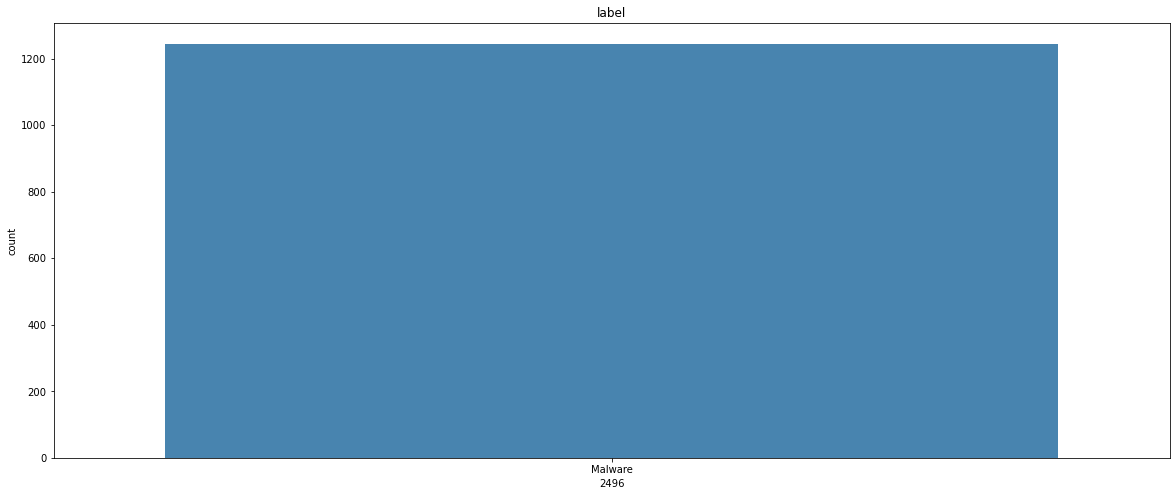

In [232]:
plt.figure(figsize=(20,8))
sns.countplot(x="2496",data=data1,palette="Blues_d")
plt.title("label")

In [16]:
data1

,0,1,2,3,4,5,6,7,8,9,...,2486,2487,2488,2489,2490,2491,2492,2494,2495,2496
0,119,0,0.0,4,25,19,16,45,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smsreg,Riskware,Malware
1,2,0,0.0,4,1,1,3,21,19,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smsspy,Ransomware,Malware
2,52,0,0.0,13,5,7,3,15,7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oimobi,Adware,Malware
3,7,0,0.0,8,3,7,7,34,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inoco,Adware,Malware
4,84,0,0.0,16,22,13,3,31,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smsreg,Riskware,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,487,2,0.0,205,11,13,7,31,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smspay,Riskware,Malware
1241,14,0,0.0,788,3,5,0,26,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,shedun,Adware,Malware
1242,2,0,0.0,1,8,4,8,35,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smspay,Riskware,Malware
1243,0,0,0.0,948,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loki,Adware,Malware


Text(0.5, 1.0, 'categorie')

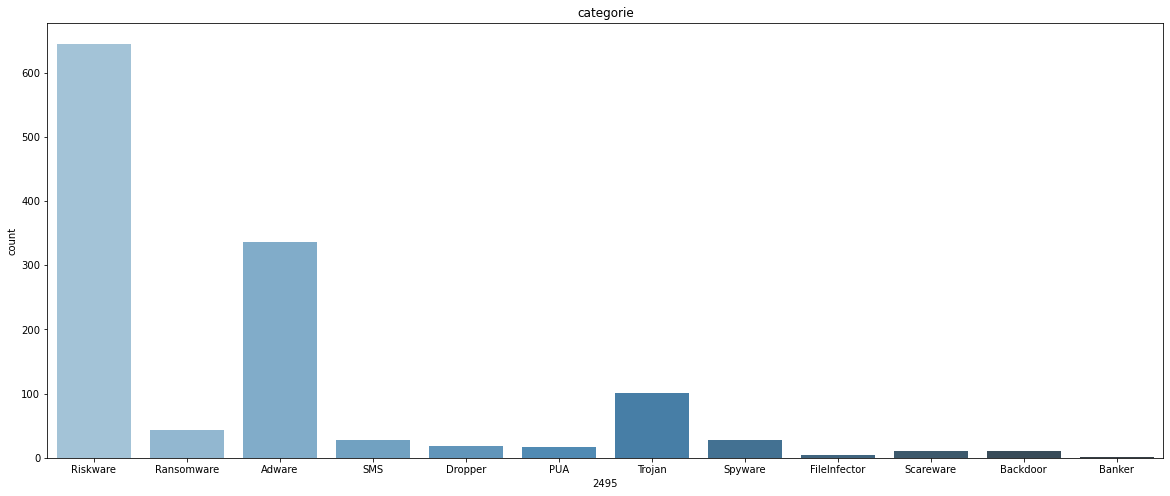

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(x="2495",data=data1,palette="Blues_d")
plt.title("categorie")

Text(0.5, 1.0, 'famille')

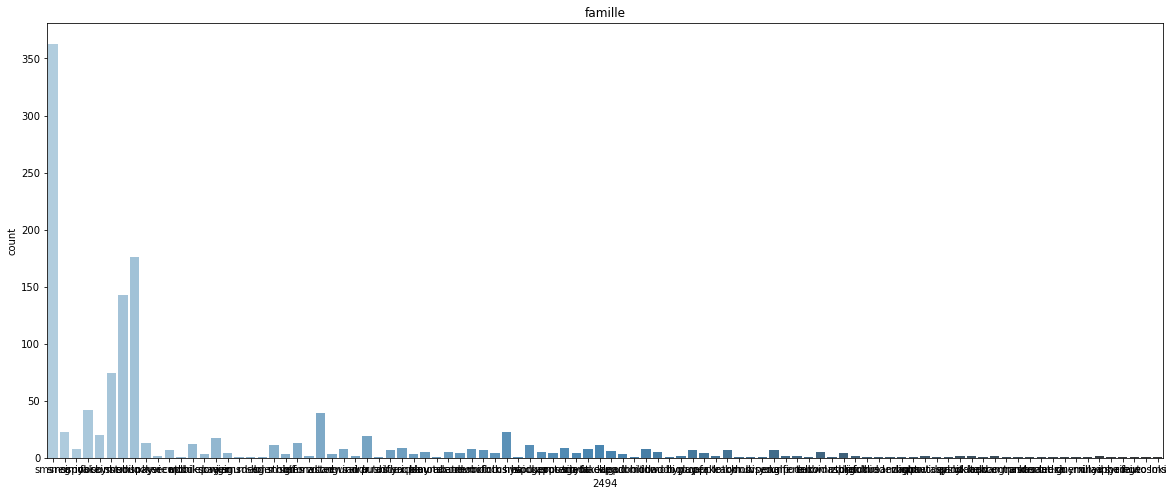

In [50]:
plt.figure(figsize=(20,8))
sns.countplot(x="2494",data=data1,palette="Blues_d")
plt.title("famille")

In [51]:
data1 = data1.drop('2494', axis = 1)

In [52]:
data1

,0,1,2,3,4,5,6,7,8,9,...,2485,2486,2487,2488,2489,2490,2491,2492,2495,2496
0,119,0,0.0,4,25,19,16,45,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Riskware,Malware
1,2,0,0.0,4,1,1,3,21,19,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ransomware,Malware
2,52,0,0.0,13,5,7,3,15,7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adware,Malware
3,7,0,0.0,8,3,7,7,34,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adware,Malware
4,84,0,0.0,16,22,13,3,31,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Riskware,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,487,2,0.0,205,11,13,7,31,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Riskware,Malware
1241,14,0,0.0,788,3,5,0,26,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adware,Malware
1242,2,0,0.0,1,8,4,8,35,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Riskware,Malware
1243,0,0,0.0,948,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adware,Malware


In [53]:
sd = data1.std()
print(sd.shape)
print("Variables avec écart-type nul : ",np.where(sd==0))
print("Variables avec écart-type non défini : ",np.where(np.isnan(sd)))

data = data1.drop( np.array(np.where(sd==0)[0],dtype = str) , axis = 1)

(2493,)
Variables avec écart-type nul :  (array([  30,   42,   65, ..., 2490, 2491, 2492]),)
Variables avec écart-type non défini :  (array([], dtype=int64),)


/var/folders/wh/x3hz6xrd28l0p9j3wqv5bp4m0000gn/T/ipykernel_43043/1140024124.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sd = data1.std()


In [256]:
data_np = data.to_numpy()

X = data_np[:,:-2]
Y = data_np[:,-2]
Y_binaire = LabelBinarizer().fit_transform(Y)
y = Y_binaire[:,0]
## Préparation des données pour le machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

print("Pourcentage de riskware dans la base complète : ",np.round(np.mean(Y=="Adware"),3))
print("Pourcentage de riskware dans la base d'apprentissage : ",np.round(np.mean(y_train==1),3))

Pourcentage de riskware dans la base complète :  0.27
Pourcentage de riskware dans la base d'apprentissage :  0.252


In [257]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

(373, 2)
(373,)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

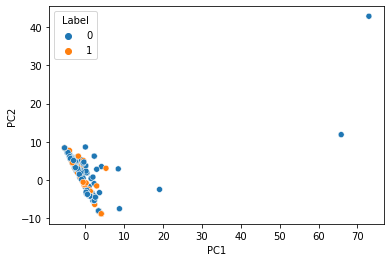

In [258]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PC = pca.transform(X_train_sc)
print(PC.shape)
print(y_train.shape)

d = {'PC1': PC[:,0], 'PC2': PC[:,1], 'Label':y_train}
df = pd.DataFrame(data=d)

sns.scatterplot(x="PC1",y="PC2",hue="Label",data = df)

In [259]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train)
y_pred = knn.predict(X_test_sc)

In [260]:
f1 = f1_score(y_test,y_pred,pos_label=1)
r = recall_score(y_test,y_pred,pos_label=1)
p = precision_score(y_test,y_pred,pos_label=1)
print("Precision:"%d, np.round(p,3))
print("recall:"%d, np.round(r,3))
print("f1-score:"%d, np.round(f1,3))

Precision: 0.806
recall: 0.583
f1-score: 0.676


In [261]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix : ")
print(cm)

Confusion matrix : 
[[596  34]
 [101 141]]


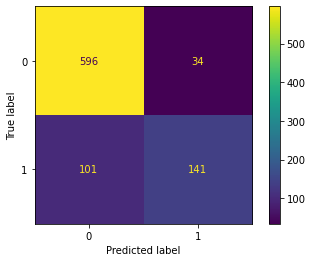

In [263]:

ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

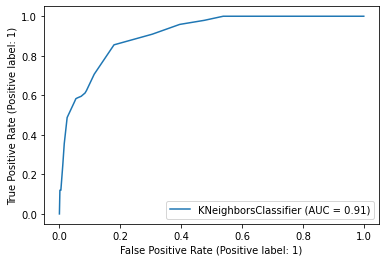

In [264]:


plot_roc_curve(knn, X_test_sc, y_test)  
plt.show()

In [265]:
# Generation de B ensemble d'entrainement/validation 
B = 5
cv = KFold(n_splits=B, random_state=None, shuffle=True)
knn = neighbors.KNeighborsClassifier()
param_grid = [{'n_neighbors': [1,5,10,20], 
               'weights': ['uniform','distance'],
               'metric': ['euclidean','manhattan']}]
# Optimization of the hyperparameters
search = GridSearchCV(knn, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1) # n_jobs=-1 permet d'utiliser tous les processeurs (calcul parallèle)
search.fit(X_train_sc,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
KNeighborsClassifier(metric='euclidean', weights='distance')


In [266]:
knn_best = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [267]:
y_pred_knn = search.best_estimator_.predict(X_test_sc)
print("Confusion matrix : ")
print(confusion_matrix(y_test,y_pred_knn))
print("Accuracy : ",np.round(accuracy_score(y_test,y_pred_knn),4))

Confusion matrix : 
[[587  43]
 [ 65 177]]
Accuracy :  0.8761


Confusion matrix (LDA): 
[[550  80]
 [ 64 178]]


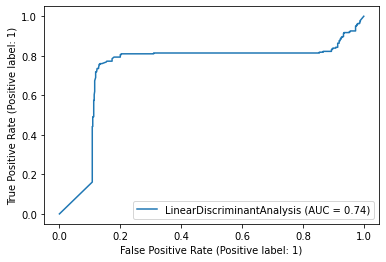

In [268]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_sc,y_train)
y_pred_lda = lda.predict(X_test_sc)

print("Confusion matrix (LDA): ")
print(confusion_matrix(y_test,y_pred_lda))

plot_roc_curve(lda, X_test_sc, y_test)  
plt.show()

In [269]:
f1 = f1_score(y_test,y_pred_lda,pos_label=1)
r = recall_score(y_test,y_pred_lda,pos_label=1)
p = precision_score(y_test,y_pred_lda,pos_label=1)
print("Precision:"%d, np.round(p,3), "recall:"%d, np.round(r,3), "f1-score:"%d, np.round(f1,3))

Precision: 0.69 recall: 0.736 f1-score: 0.712


In [270]:
clf = linear_model.LogisticRegression(max_iter = 3000)
clf.fit(X_train_sc,y_train)

LogisticRegression(max_iter=3000)

In [271]:
param_grid = {'C':[1e-03,1e-02,1e-01,1,10,100,1000]}
clf = linear_model.LogisticRegression(penalty='l1',
                                      solver='saga',
                                      max_iter=1e4)
search = GridSearchCV(clf, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train_sc,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
LogisticRegression(C=1, max_iter=10000.0, penalty='l1', solver='saga')


# Decision Tree

In [272]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

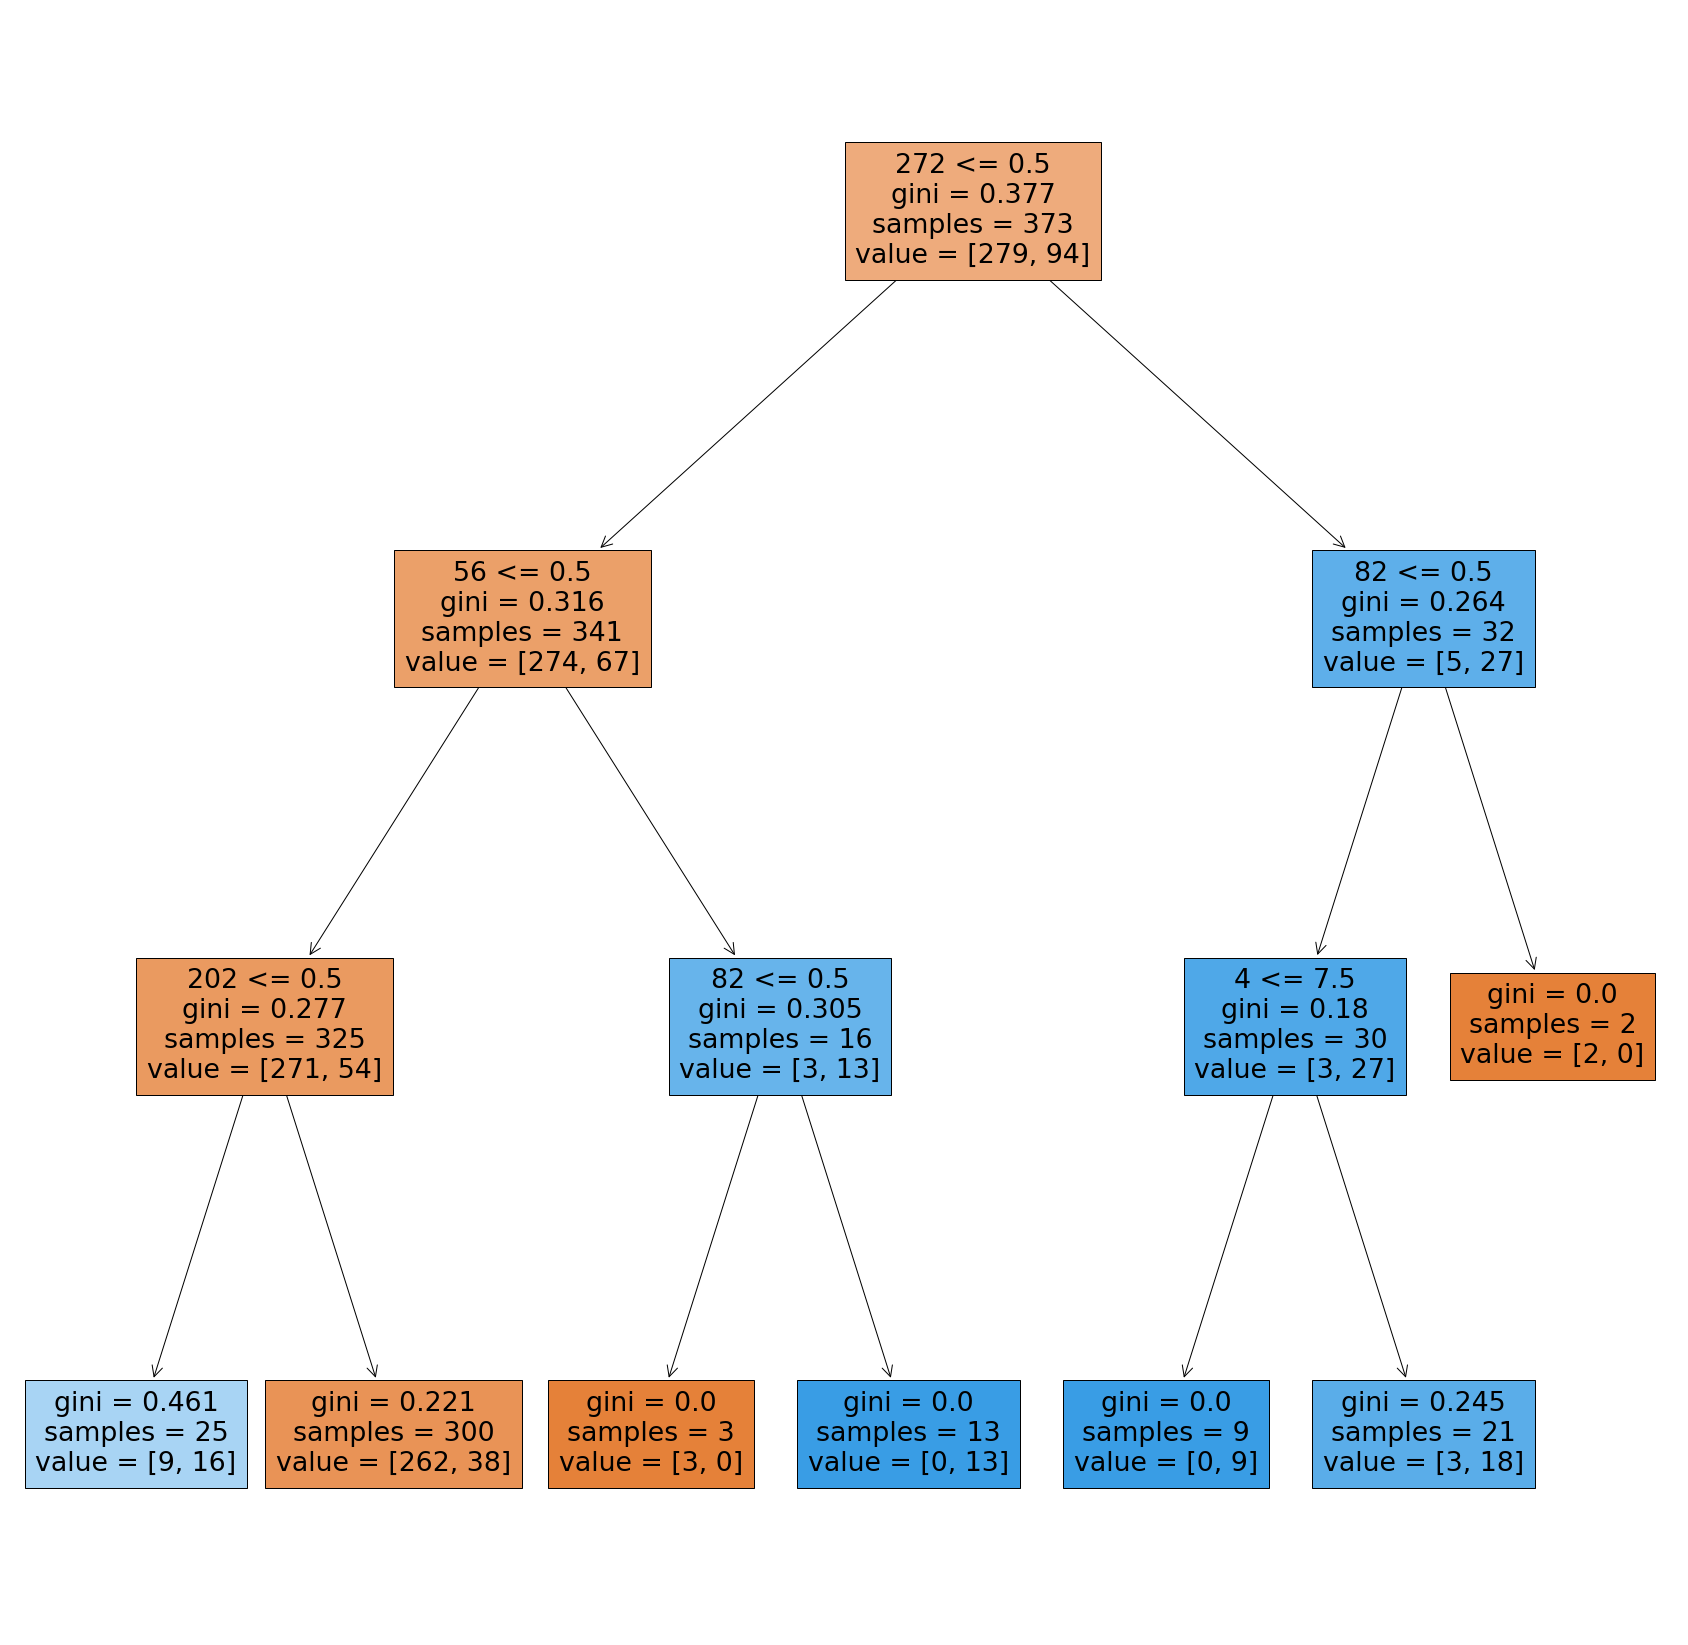

In [273]:
plt.figure(figsize=(30,30))
plot_tree(clf,filled=True, feature_names=varnames) 
plt.show()

In [274]:
y_pred = clf.predict(X_test)
f1 = f1_score(y_test,y_pred,pos_label=1, average = 'macro')
r = recall_score(y_test,y_pred,pos_label=1, average = 'macro')
p = precision_score(y_test,y_pred,pos_label=1, average = 'macro')
print("Precision:"%d, np.round(p,3), "recall:"%d, np.round(r,3), "f1-score:"%d, np.round(f1,3))

Precision: 0.822 recall: 0.705 f1-score: 0.732


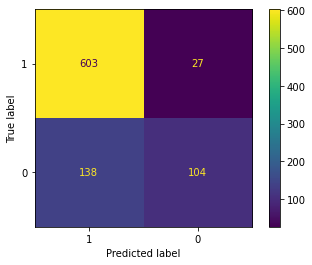

In [181]:
cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

In [182]:
B = 5
cv = KFold(n_splits=B, random_state=4, shuffle=True)

########### code ici
param_grid = {'max_depth':[5,10,15,20], 
             'min_samples_leaf':[5,10,15,20],
             'splitter' : ['best', 'random']}
clf = DecisionTreeClassifier()
search = GridSearchCV(clf, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, splitter='random')


In [183]:
scoring=("accuracy","precision","recall","f1","roc_auc")

tree = search.best_estimator_
cv_scores = cross_validate(tree, X_train, y_train, cv=cv,scoring=scoring)

print("Performances de l'arbre de décision")
print("Accuracy  : ", np.round(np.mean(cv_scores["test_accuracy"]),2), "(",np.round(np.std(cv_scores["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores["test_precision"]),2), "(",np.round(np.std(cv_scores["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores["test_recall"]),2), "(",np.round(np.std(cv_scores["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores["test_f1"]),2), "(",np.round(np.std(cv_scores["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores["test_roc_auc"]),2), "(",np.round(np.std(cv_scores["test_roc_auc"]),2),")")

Performances de l'arbre de décision
Accuracy  :  0.87 ( 0.04 )
Precision :  0.75 ( 0.07 )
Recall    :  0.78 ( 0.11 )
F1-score  :  0.76 ( 0.07 )
AUC       :  0.91 ( 0.05 )


Confusion matrix  : 
[[590  40]
 [ 54 188]]
 
Confusion matrix (proportions) : 
[[0.94 0.06]
 [0.22 0.78]]
 


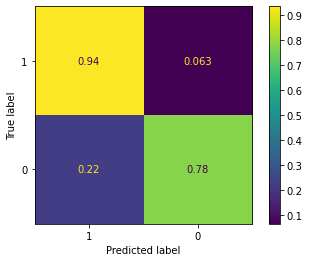

<Figure size 432x432 with 0 Axes>

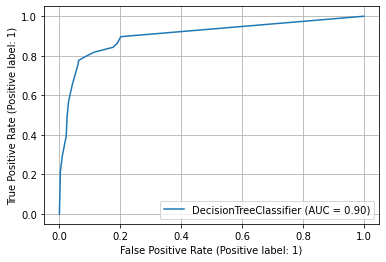

In [191]:
y_pred_tree = tree.predict(X_test)
print("Confusion matrix  : ")
print(confusion_matrix(y_test,y_pred_tree))
print(' ')
print("Confusion matrix (proportions) : ")
cm = confusion_matrix(y_test,y_pred_tree,normalize='true')
print(np.round(cm,2))
print(' ')

ConfusionMatrixDisplay(cm, display_labels=[1,0]).plot()
                                       

plt.figure(figsize=(6,6))
plot_roc_curve(tree,X_test,y_test)
plt.grid()

tree_fpr, tree_tpr, thresholds = roc_curve(y_test, y_pred_tree)


knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred_knn)

on compare avec l'algorithme des plus proches voisins

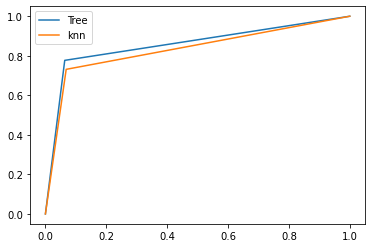

In [192]:
plt.plot(tree_fpr,tree_tpr,label="Tree")
plt.plot(knn_fpr,knn_tpr,label = "knn")
plt.legend()

# Random Forest

In [198]:
param_grid = {'max_depth':[3,5,10], 
             'max_features':[5,10,15,20]}

rf = RandomForestClassifier()
search_rf = GridSearchCV(rf, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search_rf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [5, 10, 15, 20]},
             scoring='accuracy')

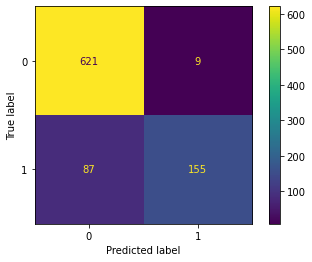

In [223]:
rf = search_rf.best_estimator_
y_pred_rf = rf.predict(X_test)

rmse = np.round(np.sqrt(np.mean((y_test-y_pred_rf)**2)),2)


cm = confusion_matrix(y_test,y_pred_rf)
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

In [207]:
FI = rf.feature_importances_


importances = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=0)

In [209]:
importances

array([ 0.00344037,  0.00114679,  0.00022936,  0.00951835,  0.0081422 ,
        0.00883028,  0.00550459, -0.00068807,  0.01594037,  0.0037844 ,
        0.00011468,  0.00493119,  0.00045872,  0.00022936,  0.00011468,
        0.        ,  0.00321101,  0.        ,  0.        ,  0.00068807,
       -0.00045872, -0.00045872,  0.00412844,  0.00366972,  0.00504587,
        0.00057339,  0.        ,  0.00194954,  0.00057339,  0.        ,
        0.00263761,  0.00103211,  0.00045872,  0.00034404,  0.00057339,
        0.00756881,  0.00504587,  0.00057339,  0.        ,  0.00034404,
        0.00011468,  0.00206422,  0.        ,  0.00126147,  0.        ,
        0.0043578 ,  0.00711009,  0.00091743,  0.00137615,  0.00103211,
        0.00068807,  0.00504587,  0.00699541,  0.00768349,  0.00045872,
        0.00011468,  0.00011468,  0.0043578 ,  0.00103211,  0.00114679,
        0.00412844,  0.00080275,  0.        ,  0.00022936,  0.        ,
        0.00022936,  0.00355505,  0.        ,  0.        ,  0.  

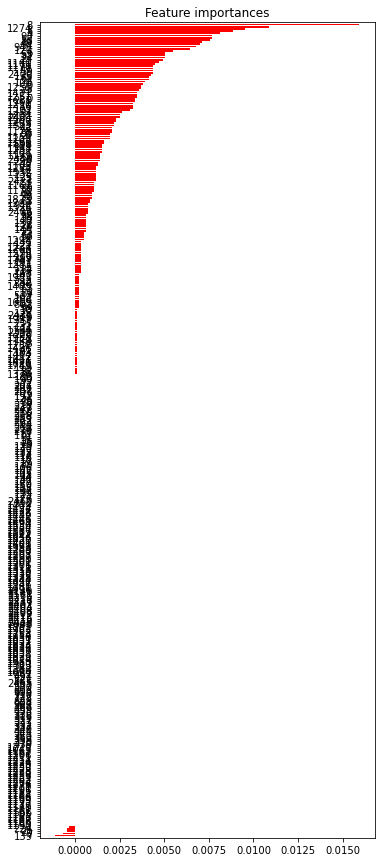

In [208]:
importances = importances.importances_mean
indices = np.argsort(importances)
plt.figure(figsize=(6,15))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.yticks(range(X.shape[1]), data.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

In [210]:
scoring=("accuracy","precision","recall","f1","roc_auc")

cv_scores_tree = cross_validate(tree, X_train, y_train, cv=cv,scoring=scoring)
cv_scores_rf = cross_validate(rf, X_train, y_train, cv=cv,scoring=scoring)
print("Performances Random Forest")
print("Accuracy  : ", np.round(np.mean(cv_scores_rf["test_accuracy"]),2), "(",np.round(np.std(cv_scores_rf["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores_rf["test_precision"]),2), "(",np.round(np.std(cv_scores_rf["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores_rf["test_recall"]),2), "(",np.round(np.std(cv_scores_rf["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores_rf["test_f1"]),2), "(",np.round(np.std(cv_scores_rf["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores_rf["test_roc_auc"]),2), "(",np.round(np.std(cv_scores_rf["test_roc_auc"]),2),")")
print("Performances de l'arbre de décision")
print("Accuracy  : ", np.round(np.mean(cv_scores_tree["test_accuracy"]),2), "(",np.round(np.std(cv_scores_tree["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores_tree["test_precision"]),2), "(",np.round(np.std(cv_scores_tree["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores_tree["test_recall"]),2), "(",np.round(np.std(cv_scores_tree["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores_tree["test_f1"]),2), "(",np.round(np.std(cv_scores_tree["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores_tree["test_roc_auc"]),2), "(",np.round(np.std(cv_scores_tree["test_roc_auc"]),2),")")

Performances Random Forest
Accuracy  :  0.9 ( 0.04 )
Precision :  0.94 ( 0.03 )
Recall    :  0.67 ( 0.11 )
F1-score  :  0.78 ( 0.07 )
AUC       :  0.96 ( 0.02 )
Performances de l'arbre de décision
Accuracy  :  0.87 ( 0.04 )
Precision :  0.72 ( 0.08 )
Recall    :  0.79 ( 0.09 )
F1-score  :  0.75 ( 0.05 )
AUC       :  0.9 ( 0.05 )


In [212]:

param_grid = {
 'n_estimators': [30, 50, 60],
 'learning_rate' : [0.01,0.1,1]
 }

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
search = GridSearchCV(adaboost, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=30)


In [213]:
ada_best = search.best_estimator_
y_pred_ada = ada_best.predict(X_test)

In [214]:

param_grid = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }


search = GridSearchCV(GradientBoostingClassifier(),
                   param_grid=param_grid, 
                   cv=cv, 
                   scoring = "accuracy", 
                   n_jobs=-1)

search.fit(X_train,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
GradientBoostingClassifier(learning_rate=0.05)


In [215]:
GB_best = search.best_estimator_
y_pred_GB = GB_best.predict(X_test)

In [216]:
cv_scores_ab = cross_validate(ada_best, X_train, y_train, cv=cv,scoring=scoring)
print("Performances boost")
print("Accuracy  : ", np.round(np.mean(cv_scores_ab["test_accuracy"]),2), "(",np.round(np.std(cv_scores_ab["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores_ab["test_precision"]),2), "(",np.round(np.std(cv_scores_ab["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores_ab["test_recall"]),2), "(",np.round(np.std(cv_scores_ab["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores_ab["test_f1"]),2), "(",np.round(np.std(cv_scores_ab["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores_ab["test_roc_auc"]),2), "(",np.round(np.std(cv_scores_ab["test_roc_auc"]),2),")")
cv_scores_gb = cross_validate(GB_best, X_train, y_train, cv=cv,scoring=scoring)
print("Performances gradient boost")
print("Accuracy  : ", np.round(np.mean(cv_scores_gb["test_accuracy"]),2), "(",np.round(np.std(cv_scores_gb["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores_gb["test_precision"]),2), "(",np.round(np.std(cv_scores_gb["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores_gb["test_recall"]),2), "(",np.round(np.std(cv_scores_gb["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores_gb["test_f1"]),2), "(",np.round(np.std(cv_scores_gb["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores_gb["test_roc_auc"]),2), "(",np.round(np.std(cv_scores_gb["test_roc_auc"]),2),")")

Performances boost
Accuracy  :  0.9 ( 0.04 )
Precision :  0.87 ( 0.11 )
Recall    :  0.74 ( 0.12 )
F1-score  :  0.79 ( 0.07 )
AUC       :  0.95 ( 0.03 )
Performances gradient boost
Accuracy  :  0.9 ( 0.04 )
Precision :  0.88 ( 0.08 )
Recall    :  0.73 ( 0.1 )
F1-score  :  0.79 ( 0.08 )
AUC       :  0.96 ( 0.02 )


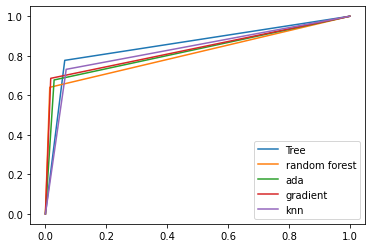

In [218]:
tree_fpr, tree_tpr, thresholds = roc_curve(y_test, y_pred_tree)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred_rf)
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred_ada)
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred_GB)


plt.plot(tree_fpr,tree_tpr,label="Tree")
plt.plot(rf_fpr,rf_tpr,label = "random forest")
plt.plot(ada_fpr,ada_tpr,label="ada")
plt.plot(gb_fpr,gb_tpr,label = "gradient")
plt.plot(knn_fpr,knn_tpr,label = "knn")
plt.legend()